# **K-Means Clustering**

# Importing libraries

In [240]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing dataset

In [241]:
dataset = pd.read_csv('/content/drive/MyDrive/Amazon User Segmentation/amazon_cluster_model.csv')

In [242]:
print(dataset)

     Cus_ID Sex  Age  Income  Rating
0    301219   M   23   53667     150
1    301220   F   32   50420     106
2    301221   M   23   62896      10
3    301222   M   32   55306      22
4    301223   F   34   20634     117
..      ...  ..  ...     ...     ...
197  301416   M   24   30710     115
198  301417   F   25   55340      66
199  301418   M   26   41269     142
200  301419   F   28   64338      82
201  301420   M   28   21533     144

[202 rows x 5 columns]


# Pre Processing

Scaling down rating to 0 to 100

In [243]:
max_value = dataset['Rating'].max()

In [244]:
dataset['Scaled Rating'] = (dataset['Rating'] / max_value) * 100

In [245]:
dataset['Scaled Rating'] = dataset['Scaled Rating'].astype(int)

In [246]:
dataset = dataset.drop(columns=['Rating'])

In [247]:
dataset = dataset.rename(columns={'Scaled Rating': 'Rating'})

In [248]:
print(dataset)

     Cus_ID Sex  Age  Income  Rating
0    301219   M   23   53667     100
1    301220   F   32   50420      70
2    301221   M   23   62896       6
3    301222   M   32   55306      14
4    301223   F   34   20634      78
..      ...  ..  ...     ...     ...
197  301416   M   24   30710      76
198  301417   F   25   55340      44
199  301418   M   26   41269      94
200  301419   F   28   64338      54
201  301420   M   28   21533      96

[202 rows x 5 columns]


In [249]:
print(dataset['Income'])

0      53667
1      50420
2      62896
3      55306
4      20634
       ...  
197    30710
198    55340
199    41269
200    64338
201    21533
Name: Income, Length: 202, dtype: int64


Dropping Cus_Id since we don't need it

In [250]:
dataset = dataset.drop(columns=['Cus_ID'])

Sorting based on Income

In [251]:
dataset = dataset.sort_values(by='Income')

# Working on Dataset (For Income vs Rating)

In [252]:
#x = dataset.iloc[:, 5:6].values

In [253]:
column_5 = dataset.iloc[:, 2].values

In [254]:
print(column_5)

[20159 20303 20509 20634 20651 21401 21533 21739 21801 21898 22410 22706
 22982 23096 24039 24042 24595 24852 24906 24960 25012 25251 25332 25431
 25611 25627 25871 25933 26137 26141 26753 27217 27616 28291 28397 28599
 29030 29065 29134 30041 30406 30710 30865 31449 31467 31684 31957 31969
 32982 33322 33744 33945 33960 34235 34530 35198 35581 35638 36755 36775
 36804 37033 37337 37772 37842 37877 37912 38017 38131 38216 39105 39175
 39618 40666 41137 41269 41401 41450 41993 42044 42093 42172 42211 42904
 43003 43028 43128 43288 43782 44025 44415 44612 45176 45546 45840 46748
 46834 46839 46888 47153 47323 47916 48180 48244 48573 49145 49354 49389
 49723 49752 49820 50420 50548 51049 51689 52397 52452 53120 53652 53667
 53677 53930 54023 54187 54465 54522 54633 55306 55340 55380 55384 55668
 55886 55900 56024 56212 56291 56376 56406 56407 56578 56731 56903 57016
 57075 57864 58351 58623 58639 59641 59760 59785 59802 59873 60282 60395
 60473 60639 61275 61306 61370 62037 62273 62319 62

In [255]:
column_6 = dataset.iloc[:, 3].values

In [256]:
x = pd.concat([pd.Series(column_5), pd.Series(column_6)], axis=1)

In [257]:
print(x)

         0   1
0    20159  12
1    20303  22
2    20509  79
3    20634  78
4    20651  57
..     ...  ..
197  69303  96
198  69445   9
199  69491  74
200  69546   6
201  69893   6

[202 rows x 2 columns]


# Working on Dataset (For Age vs Rating)

In [258]:
print(dataset)

    Sex  Age  Income  Rating
110   F   47   20159      12
165   F   32   20303      22
138   M   23   20509      79
4     F   34   20634      78
133   F   43   20651      57
..   ..  ...     ...     ...
34    F   20   69303      96
40    F   29   69445       9
188   F   20   69491      74
194   F   24   69546       6
58    M   23   69893       6

[202 rows x 4 columns]


In [259]:
column_a = dataset.iloc[:, 1].values
column_b = dataset.iloc[:, 3].values

x_age = pd.concat([pd.Series(column_a), pd.Series(column_b)], axis=1)

In [260]:
print(x_age)

      0   1
0    47  12
1    32  22
2    23  79
3    34  78
4    43  57
..   ..  ..
197  20  96
198  29   9
199  20  74
200  24   6
201  23   6

[202 rows x 2 columns]


In [261]:
print(column_a)

[47 32 23 34 43 21 28 21 45 23 46 33 25 32 20 25 28 25 19 28 47 28 31 26
 34 19 29 23 23 29 38 28 35 21 28 28 27 23 23 23 27 24 20 32 34 35 23 48
 37 23 39 43 43 34 31 20 23 29 25 43 27 30 23 23 27 46 28 27 43 45 37 23
 39 26 35 26 23 32 47 54 26 43 26 23 48 45 23 45 27 46 27 29 45 29 43 43
 26 46 23 31 45 34 34 23 27 43 32 44 45 32 45 32 23 36 32 46 39 43 23 23
 26 43 24 45 56 20 25 32 25 37 25 35 47 34 34 18 45 43 34 23 29 28 29 36
 26 45 23 27 23 23 26 34 43 23 43 54 23 29 34 23 23 33 43 33 29 39 42 25
 45 23 38 30 23 32 28 45 29 23 48 39 29 24 27 43 21 23 24 25 22 25 28 29
 22 38 22 43 23 20 29 20 24 23]


# Optimal number of clusters via Elbow Method

In [262]:
from sklearn.cluster import KMeans

In [263]:
wcss = []

In [264]:
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 21,  n_init=10)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

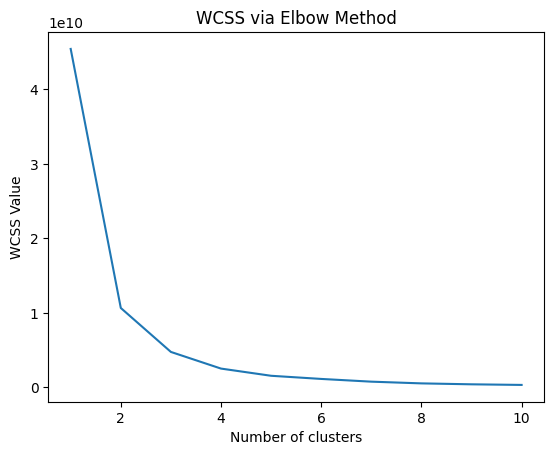

In [265]:
plt.plot(range(1,11), wcss)
plt.title('WCSS via Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS Value')

plt.show()

# K Means Model Training on Training Set (For Income vs Rating)

In [276]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 21, n_init=10)
y_means = kmeans.fit_predict(x)

In [277]:
print(y_means)

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


# K Means Model Training on Training Set (For Age vs Rating)

In [270]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 21, n_init=10)
y_age_means = kmeans.fit_predict(x_age)

In [271]:
print(y_age_means)

[2 2 3 0 0 3 3 1 0 3 3 0 3 3 2 2 2 0 2 2 1 2 2 2 1 1 3 3 1 0 0 3 1 1 0 0 2
 1 0 0 2 0 2 3 0 1 2 1 0 1 1 1 0 3 1 3 2 3 0 1 1 1 3 3 2 0 3 3 1 0 1 1 3 1
 1 3 2 1 1 0 1 0 3 3 1 0 3 2 3 0 0 2 2 1 1 2 3 2 2 1 0 2 3 3 1 2 1 0 2 0 1
 0 0 1 0 2 0 0 1 3 2 1 3 1 0 1 0 2 1 2 1 3 0 1 3 3 1 2 1 2 1 1 3 2 3 0 3 2
 1 3 2 1 1 0 0 0 2 1 2 3 3 3 1 0 2 2 3 3 1 2 2 3 1 1 1 2 2 1 2 3 1 0 3 1 3
 1 3 1 1 0 2 2 3 1 2 2 2 3 2 0 2 2]


# Visualizing Clusters (For income vs Rating)

In [278]:
x_array = x.to_numpy()

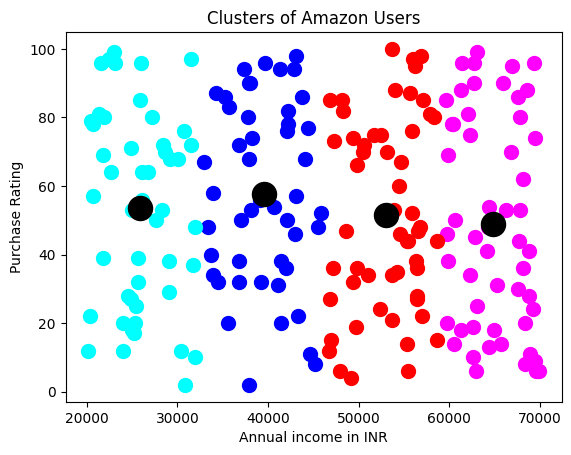

In [279]:
plt.scatter(x_array[y_means == 0, 0], x_array[y_means == 0, 1], s = 100, c = 'magenta', label = 'Cluster 1')
plt.scatter(x_array[y_means == 1, 0], x_array[y_means == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x_array[y_means == 2, 0], x_array[y_means == 2, 1], s = 100, c = 'red', label = 'Cluster 3')
plt.scatter(x_array[y_means == 3, 0], x_array[y_means == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids')
plt.title('Clusters of Amazon Users')
plt.xlabel('Annual income in INR')
plt.ylabel('Purchase Rating')

plt.show()

# Visualizing Clusters (For Age vs Rating)

In [274]:
x_age_array = x_age.to_numpy()

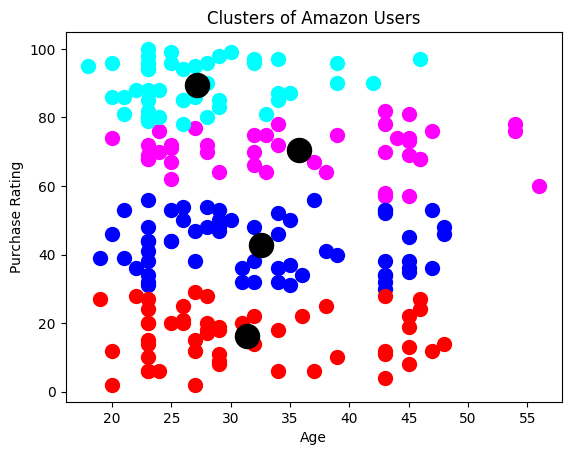

In [275]:
plt.scatter(x_age_array[y_age_means == 0, 0], x_age_array[y_age_means == 0, 1], s = 100, c = 'magenta', label = 'Cluster 1')
plt.scatter(x_age_array[y_age_means == 1, 0], x_age_array[y_age_means == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x_age_array[y_age_means == 2, 0], x_age_array[y_age_means == 2, 1], s = 100, c = 'red', label = 'Cluster 3')
plt.scatter(x_age_array[y_age_means == 3, 0], x_age_array[y_age_means == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids')
plt.title('Clusters of Amazon Users')
plt.xlabel('Age')
plt.ylabel('Purchase Rating')

plt.show()